In [68]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.interpolate import CubicSpline

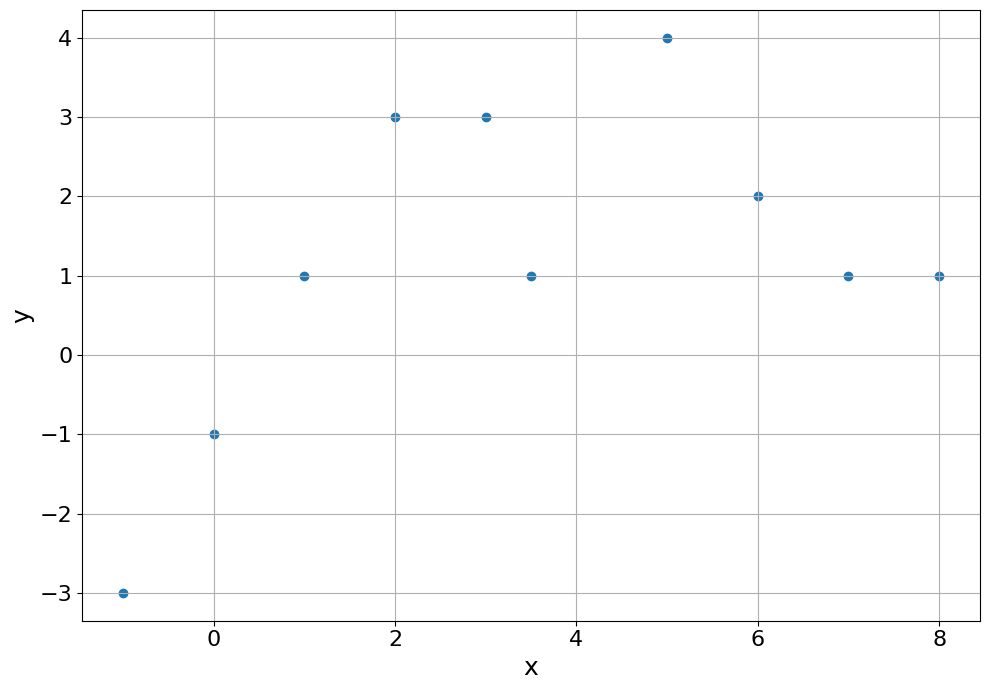

In [69]:
#data set
x1 = np.array([-1,0,1,2,3,3.5,5,6,7,8])
y1 = np.array([-3,-1,1,3,3,1,4,2,1,1])

#plotting
plt.figure(figsize=(10, 7))
#plt.plot(x, y, marker='o', linestyle='-.')
plt.scatter(x1,y1, marker='o')
plt.xlabel('x', size=18)
plt.ylabel('y', size=18)
plt.xticks(size=16)
plt.yticks(size=16)
#plt.title('Original data', size=20)
#plt.legend(fontsize=15)
plt.grid(True)
plt.tight_layout()
plt.show()

linear interpolation formula\
<font size="5"> $y = y_n + (y_{n+1} - y_{n}) \frac{x - x_n}{x_{n+1} - x_{n} }$

In [70]:
# 10 additional points between each original data interval

def new_points(x, points_per_interval):
    xnew = []

    for i in range(len(x) - 1):
        segment = np.linspace(x[i],x[i + 1], points_per_interval, endpoint=False)
        xnew.append(segment)

    xnew.append([x[-1]])
    return np.concatenate(xnew)

In [71]:
x1new = new_points(x1,11)
len(x1new)

100

In [72]:
def linear_intp(x, y, xnew):
    ynew = np.zeros_like(xnew, dtype=float)
    
    for n in range(len(x) - 1):
        # xnew points that lie in this interval
        # alternative can use if statement
        mask = (xnew >= x[n]) & (xnew < x[n+1])

        x_intp = xnew[mask]

        ynew[mask] = y[n] + (y[n+1] - y[n]) * (x_intp - x[n]) / (x[n+1] - x[n])

    # last point (exact original)
    ynew[-1] = y[-1]
    return ynew

In [73]:
y1new = linear_intp(x1, y1, x1new)

In [52]:
len(y1new)

100

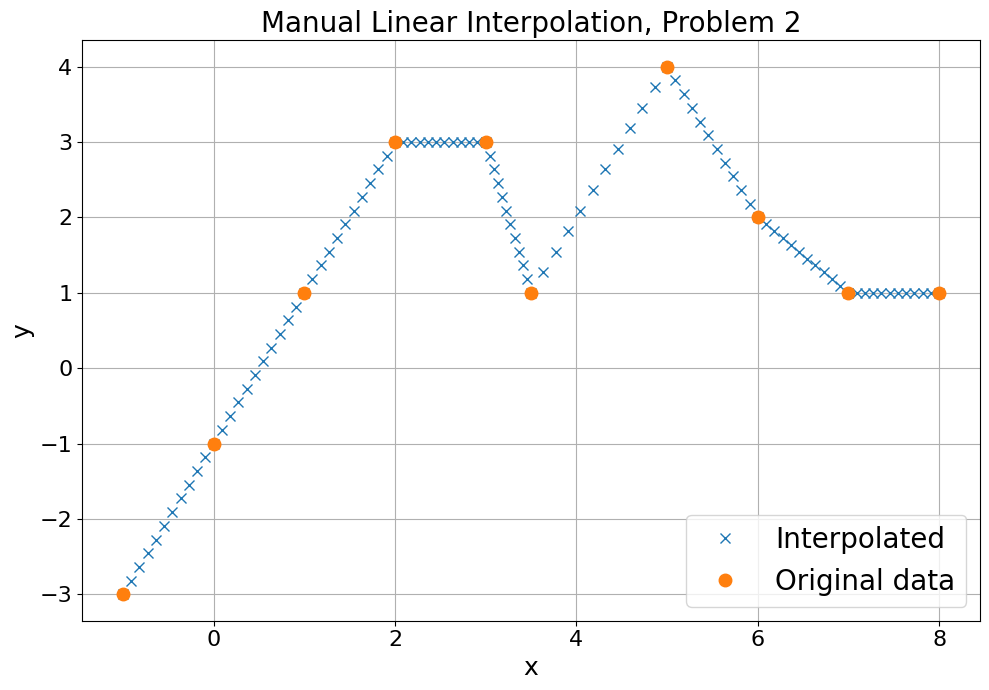

In [76]:
plt.figure(figsize=(10, 7))
#plt.plot(xnew, ynew, '-', label='Linear interpolation', color='C0')
#plt.scatter(xnew, ynew, color='blue', s=8, label='interpolated')
plt.plot(x1new, y1new, 'x', label='Interpolated', color='tab:blue', markersize=7)
plt.plot(x1, y1, 'o', label='Original data', color='tab:orange', markersize=9)

plt.xlabel('x', size=18)
plt.ylabel('y', size=18)
plt.xticks(size=16)
plt.yticks(size=16)
plt.title('Manual Linear Interpolation, Problem 2', size=20)
plt.legend(loc='lower right', fontsize=20)
plt.grid(True)
plt.tight_layout()
#plt.savefig('HW01_Prob2a.png', dpi=250, transparent=True)
plt.show()

In [145]:
#xnew

In [54]:
# Create the cubic spline interpolation
# The default boundary condition is 'not-a-knot'
def cubic_spline(x, y, xnew):
    cs = CubicSpline(x, y)
    return cs(xnew)

y1_cubic = cubic_spline(x1, y1, x1new)

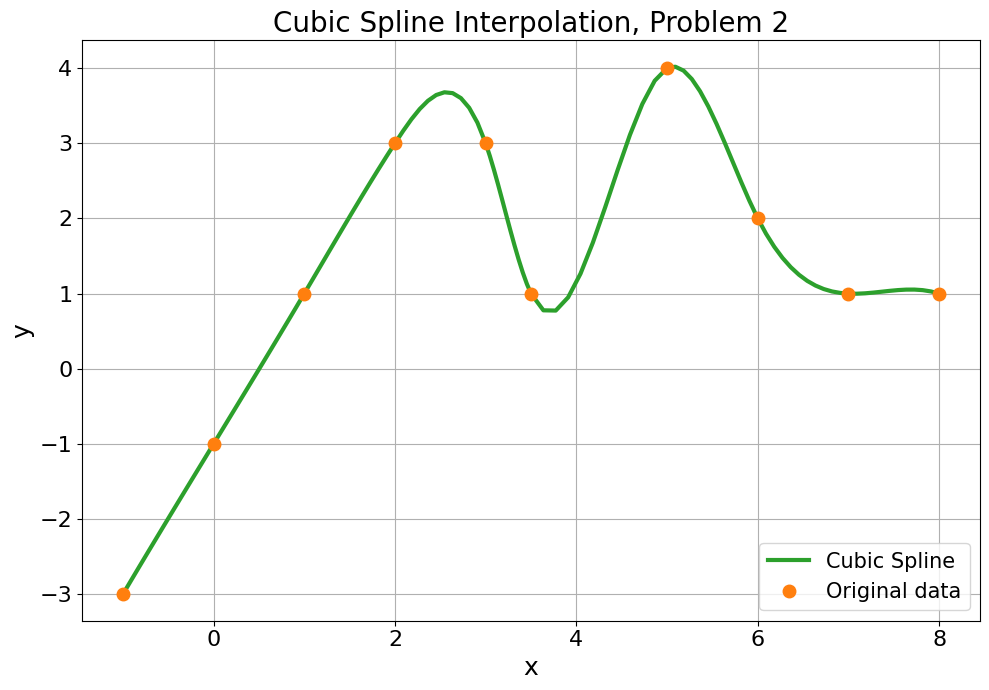

In [79]:
# Plot
plt.figure(figsize=(10, 7))
plt.plot(x1new, y1_cubic, label='Cubic Spline', color='tab:green', lw=3)
plt.plot(x1, y1, 'o', label='Original data', color='tab:orange', markersize=9)


plt.xlabel('x', size=18)
plt.ylabel('y', size=18)
plt.xticks(size=16)
plt.yticks(size=16)
plt.title('Cubic Spline Interpolation, Problem 2', size=20)
plt.legend(loc='lower right', fontsize=15)
plt.grid(True)
plt.tight_layout()
#plt.savefig('HW01_Prob2b.png', dpi=250, transparent=True)
plt.show()

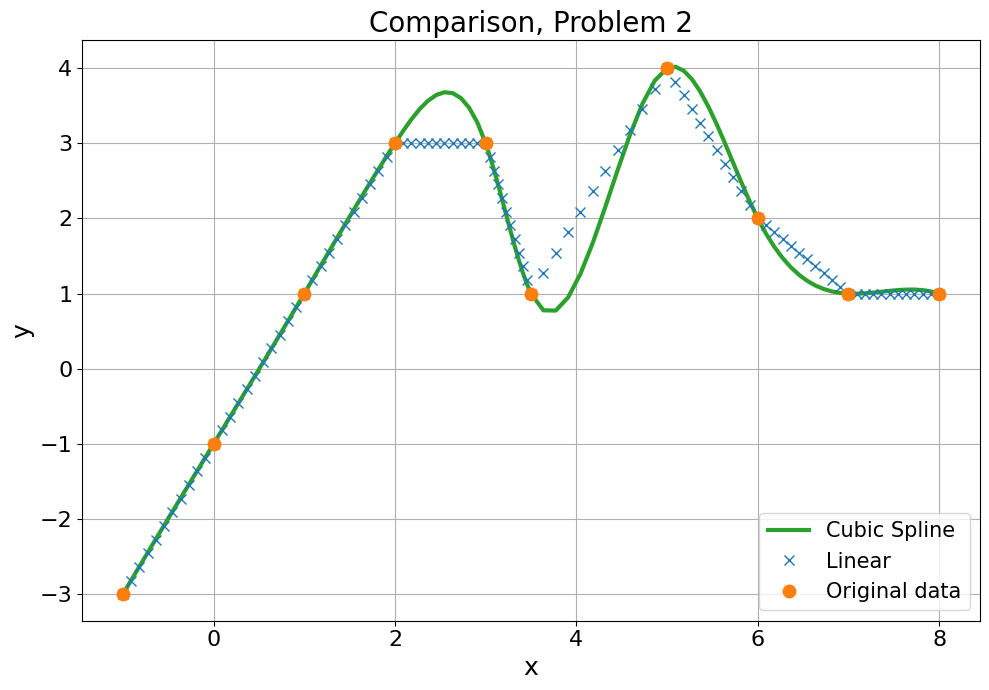

In [84]:
plt.figure(figsize=(10, 7))

plt.plot(x1new, y1_cubic, label='Cubic Spline', color='tab:green', linewidth=3)
plt.plot(x1new, y1new, 'x', color='tab:blue', markersize=7, label='Linear')
plt.plot(x1, y1, 'o', label='Original data', color='tab:orange', markersize=9)

plt.xlabel('x', size=18)
plt.ylabel('y', size=18)
plt.xticks(size=16)
plt.yticks(size=16)
plt.title('Comparison, Problem 2', size=20)
plt.legend(loc='lower right', fontsize=15)
plt.grid(True)
plt.tight_layout()
#plt.savefig('HW01_Prob2c.png', dpi=250, transparent=True)
plt.show()

In [87]:
# Notice that the spline can predict values that could be sometimes higher or lower
# than the surrounding points. I.e., it can create local minima/maxima in between the given
# datapoints. Is this OK? Give an example of a physical situation (and describe a
# hypothetical dataset) where this is probably the correct behavior, and one where it is
# probably incorrect.

# The local minima/maxima does not matter if the data represents a physical situation  
# where it also exhibit local minima/maxima. For example, an equation in physics that has 
# trigomonetry component like a simple harmonic oscillation. It will have the variation
# of amplitude and velocity that shows a maximum and minimun value. Cubic spline
# will be able to be used to model the oscillation

# The cubic spline becomes irrelevant if the data does not represent a local minima/maxima
# behavior. For instance, the relation between air pressure and altitude where the data 
# will be inversely proportional (air pressure decrease as altitude increase).
# Using linear interpolation is an appropriate way to model this data because the relation is linear.
# The application of cubic spline will shatter the characteristic of physical setting
# (i.e the result does not represent the physical theory behind the relation)

In [18]:
# Describe some of the advantages and disadvantages of the linear and cubic
# spline interpolations (both in terms of their performance and complexity of calculation
# involved)

# performance
# linear: only good for linear data, first-order, might introduce sharp curve
# cubic: function is smooth, continuous in 1st and 2nd derivative, can handle curvature

# complexity
# linear: easy to implement (only calculating slope), minimal computational cost
# cubic: more complex, involving tridiagonal matrix, more computational cost

function\
<font size="5"> $y = \sin{ \frac{\pi}{2} x} + \frac{x}{2}$

In [85]:
# Create a dataset that samples this function at every integer from 0 to 10
x2 = np.arange(0,11,1)

def func(x):
    y = np.sin(np.pi * x / 2) + x / 2
    return y

#type(x2)

y2 = func(x2)
(x2)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

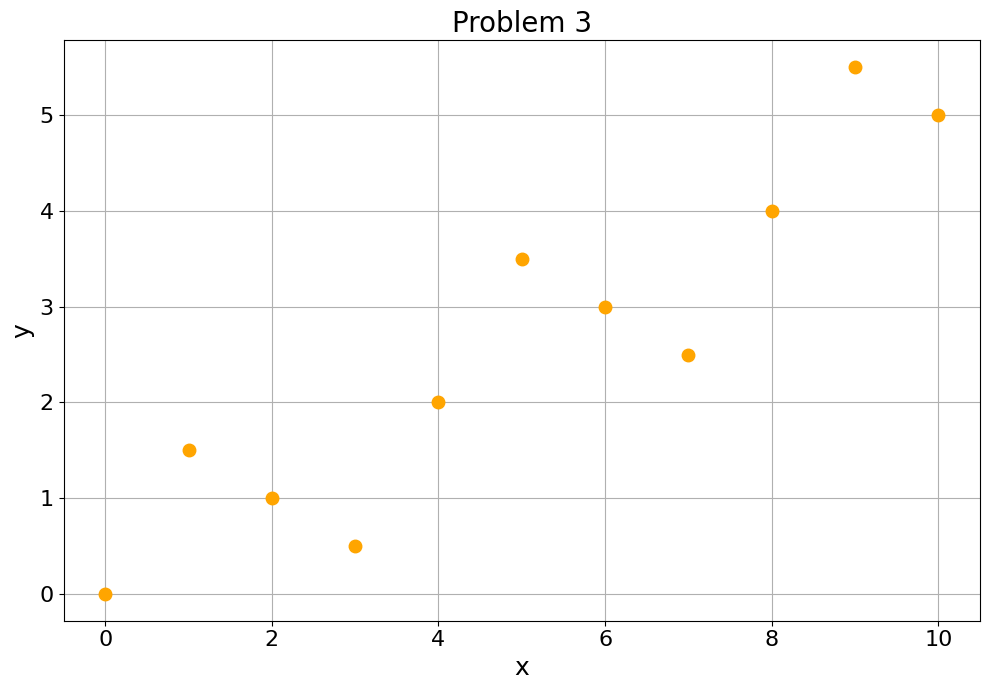

In [59]:
#plotting
plt.figure(figsize=(10, 7))
plt.plot(x2, y2, 'o', label='Problem 3', color='orange', markersize=9)
plt.xlabel('x', size=18)
plt.ylabel('y', size=18)
plt.xticks(size=16)
plt.yticks(size=16)
plt.title('Problem 3', size=20)
#plt.legend(fontsize=15)
plt.grid(True)
plt.tight_layout()
plt.show()

In [60]:
# Plot your dataset, and overplot the data interpolated to 10 times higher resolution,
# using both your linear code and an off-the-shelf cubic spline.

x2new = new_points (x2, 10)

# linear interpolation
y2new = linear_intp (x2, y2, x2new)

# cubic spline
y2_cubic = cubic_spline (x2, y2, x2new)

# true value
y2_true = func(x2new)

In [22]:
(y2new)

array([0.  , 0.15, 0.3 , 0.45, 0.6 , 0.75, 0.9 , 1.05, 1.2 , 1.35, 1.5 ,
       1.45, 1.4 , 1.35, 1.3 , 1.25, 1.2 , 1.15, 1.1 , 1.05, 1.  , 0.95,
       0.9 , 0.85, 0.8 , 0.75, 0.7 , 0.65, 0.6 , 0.55, 0.5 , 0.65, 0.8 ,
       0.95, 1.1 , 1.25, 1.4 , 1.55, 1.7 , 1.85, 2.  , 2.15, 2.3 , 2.45,
       2.6 , 2.75, 2.9 , 3.05, 3.2 , 3.35, 3.5 , 3.45, 3.4 , 3.35, 3.3 ,
       3.25, 3.2 , 3.15, 3.1 , 3.05, 3.  , 2.95, 2.9 , 2.85, 2.8 , 2.75,
       2.7 , 2.65, 2.6 , 2.55, 2.5 , 2.65, 2.8 , 2.95, 3.1 , 3.25, 3.4 ,
       3.55, 3.7 , 3.85, 4.  , 4.15, 4.3 , 4.45, 4.6 , 4.75, 4.9 , 5.05,
       5.2 , 5.35, 5.5 , 5.45, 5.4 , 5.35, 5.3 , 5.25, 5.2 , 5.15, 5.1 ,
       5.05, 5.  ])

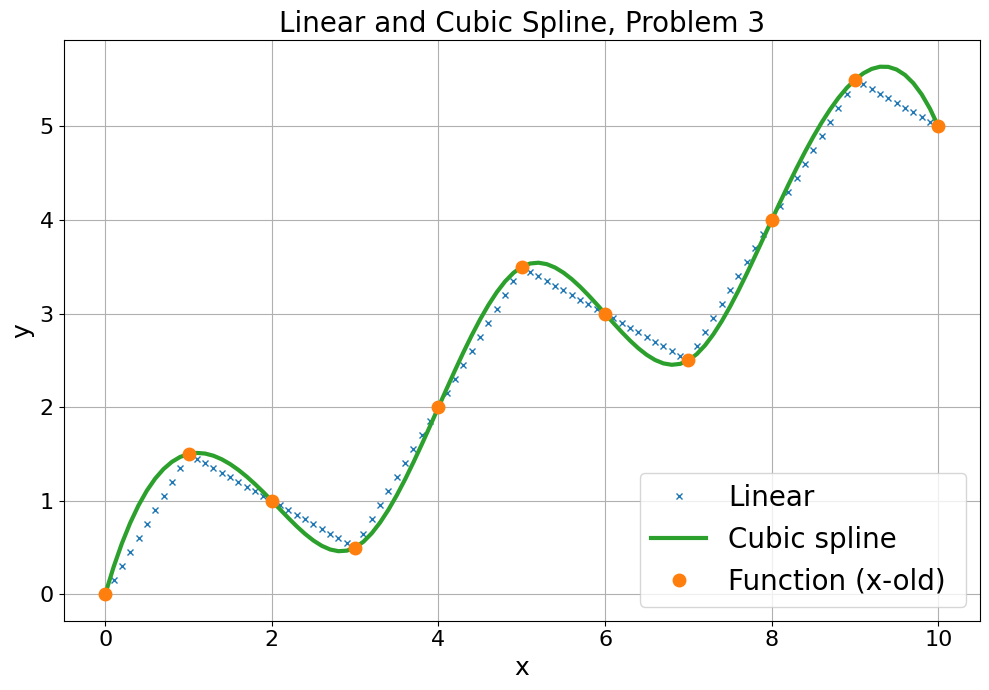

In [62]:
plt.figure(figsize=(10, 7))

plt.plot(x2new, y2new, 'x', label='Linear', color='tab:blue', markersize=5)
plt.plot(x2new, y2_cubic, label='Cubic spline', color='tab:green', linewidth=3)
plt.plot(x2, y2, 'o', label='Function (x-old) ', color='tab:orange', markersize=9)
#plt.plot(x2new, func(x2new), label='Function (x-new)', color='tab:red', linewidth=3)

plt.xlabel('x', size=18)
plt.ylabel('y', size=18)
plt.xticks(size=16)
plt.yticks(size=16)
plt.title('Linear and Cubic Spline, Problem 3', size=20)
plt.legend(loc='lower right', fontsize=20)
plt.grid(True)
plt.tight_layout()
plt.savefig('HW01_Prob3a.png', dpi=250, transparent=True)
plt.show()

In [24]:
# Plot the relative error between your interpolated values (both linear and cubic
# spline on the same plot) and the true function, in the domain 𝑥 = [0, 10]. The relative
# error is the difference between interpolated values and the true value from the function,
# divided by the true value. Comment on what the plot show

In [63]:
def rel_err (y_intp, y_true):
    result = np.zeros_like(y_true, dtype=float)
    
    rel_err = np.abs(np.divide(y_intp - y_true, y_true, out=result, where=y_true != 0))
    return rel_err

rel_err_linear = rel_err(y2new, y2_true)
rel_err_cubic = rel_err(y2_cubic, y2_true)

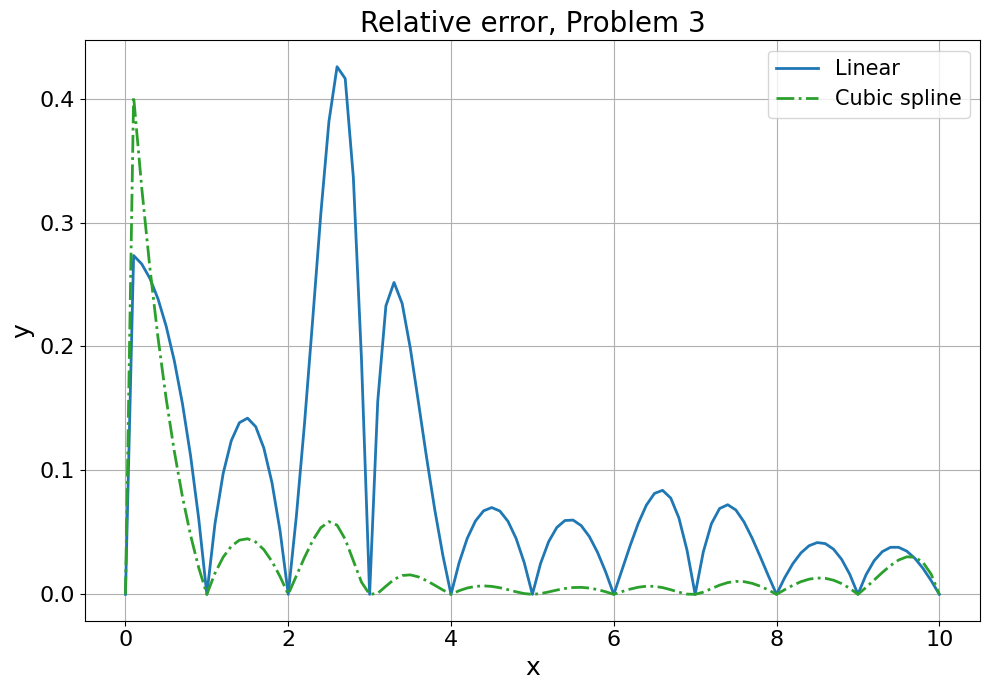

In [64]:
plt.figure(figsize=(10, 7))
plt.plot(x2new, rel_err_linear, label='Linear', color='tab:blue', linewidth=2)
plt.plot(x2new, rel_err_cubic, label='Cubic spline', color='tab:green', linewidth=2, linestyle='-.')

plt.xlabel('x', size=18)
plt.ylabel('y', size=18)
plt.xticks(size=16)
plt.yticks(size=16)
plt.title('Relative error, Problem 3', size=20)
plt.legend(loc='upper right', fontsize=15)
plt.grid(True)
plt.tight_layout()
plt.savefig('HW01_Prob3b.png', dpi=250, transparent=True)
plt.show()

In [240]:
# Cubic spline shows a better result than linear in terms of relative error
# This is due to the fact that the function it self has a trigonometry component, which is a sine function
# Since cubic spline will produce a local maxima/minima and a sine function also exhibit the same behavior,
# this method gives smaller relative error than linear
# The error is zero at every reference points because the y-value is evaluated using the function itself

In [241]:
# Imagine you have precise measurements of the position of a simple harmonic
# oscillator at discrete points in time. If you use a linear interpolation of those data in between
# the measured points, do you expect the interpolated values to exhibit conservation of mechanical
# (potential and kinetic) energy? Why or why not? Would the answer change, if you used a cubic
# spline?
# (Optional if extra time: code up such a scenario and demonstrate your answer with numerical results.)

In [33]:
# SHO
omega = np.pi
A = 2
t = np.linspace(0, 4, 21)

# SHO parameter: position, velocity, total energy
def SHO_pos(A, omega, t):
    pos = A * np.sin(omega * t)
    return pos

def SHO_vel(A, omega, t):
    vel = A * omega * np.cos(omega * t)
    return vel

def SHO_en(y, v):
    m = 1
    k = m * omega**2
    en = 0.5 * k * y**2 + 0.5 * m * v**2
    return en

pos = SHO_pos(A, omega, t)
vel = SHO_vel(A, omega, t)
en = SHO_en(pos, vel)

In [34]:
# interpolation calculation
tnew = new_points (t, 4)

# position
# linear interpolation
pos_linear = linear_intp (t, pos, tnew)
# cubic spline
pos_cubic = cubic_spline (t, pos, tnew)
# true value
pos_true = SHO_pos(A, omega, tnew)

# velocity
# linear interpolation
vel_linear = linear_intp (t, vel, tnew)
# cubic spline
vel_cubic = cubic_spline (t, vel, tnew)
# true value
vel_true = SHO_vel(A, omega, tnew)

# energy
# linear interpolation
en_linear = SHO_en(pos_linear, vel_linear)
# cubic spline
en_cubic = SHO_en(pos_cubic, vel_cubic)
# true value
en_true = SHO_en(pos_true, vel_true)

In [30]:
t

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
       2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. ])

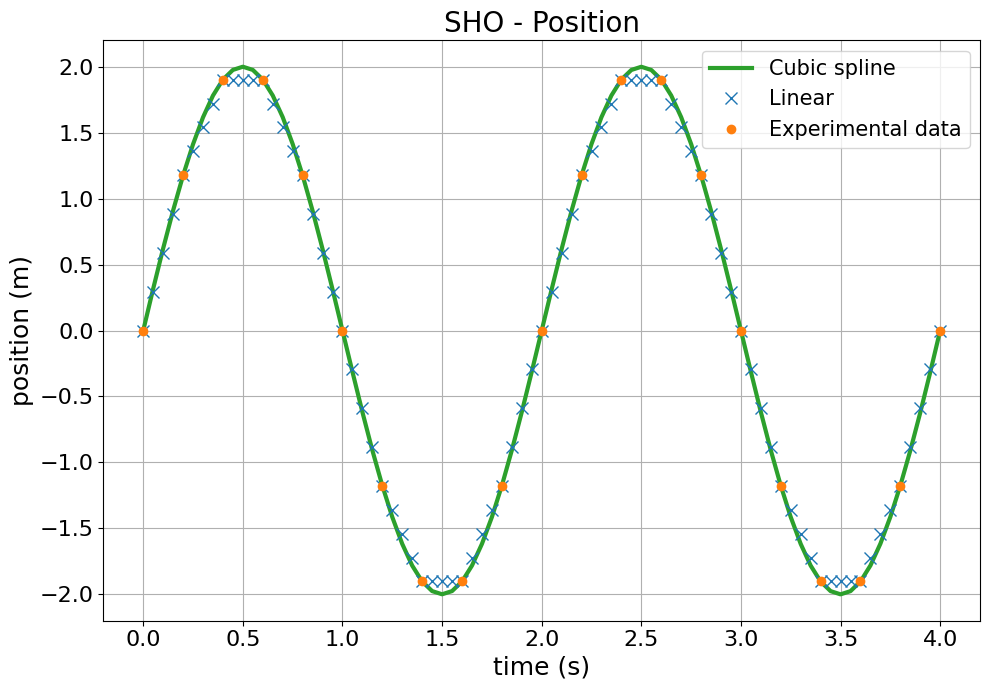

In [41]:
# plotting
plt.figure(figsize=(10, 7))

plt.plot(tnew, pos_cubic, label='Cubic spline', color='tab:green', linewidth=3)
plt.plot(tnew, pos_linear, 'x', label='Linear', color='tab:blue', markersize=9)
plt.plot(t, pos, 'o', label='Experimental data', color='tab:orange', linewidth=2)

plt.xlabel('time (s)', size=18)
plt.ylabel('position (m)', size=18)
plt.xticks(size=16)
plt.yticks(size=16)
plt.title('SHO - Position', size=20)
plt.legend(loc='upper right', fontsize=15)
plt.grid(True)
plt.tight_layout()
plt.savefig('HW01_Prob4pos.png', dpi=250, transparent=True)
plt.show()

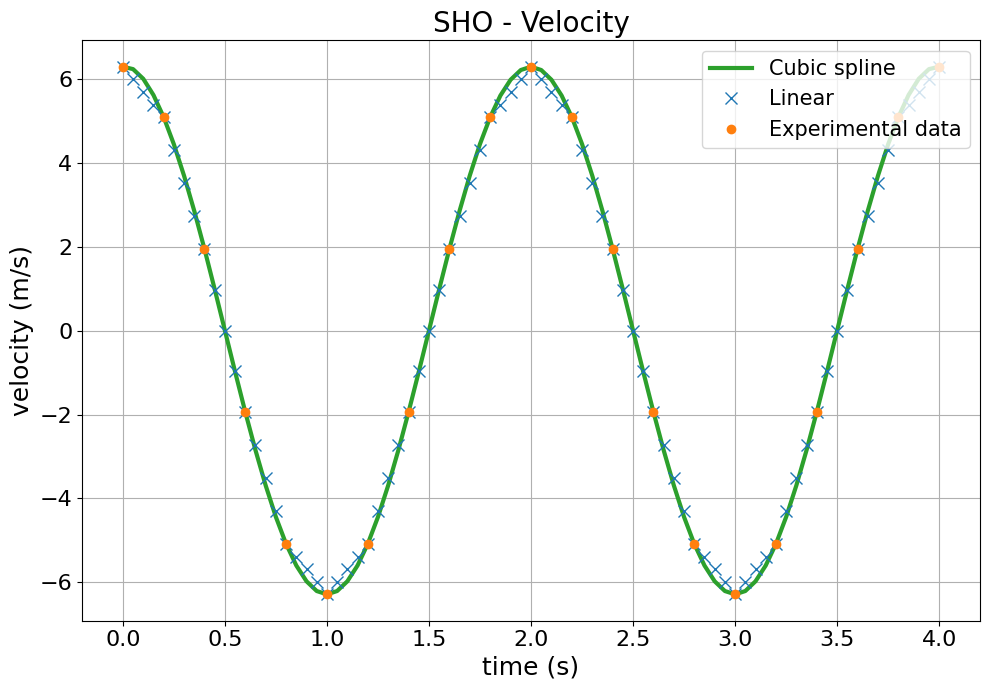

In [42]:
plt.figure(figsize=(10, 7))

plt.plot(tnew, vel_cubic, label='Cubic spline', color='tab:green', linewidth=3)
plt.plot(tnew, vel_linear, 'x', label='Linear', color='tab:blue', markersize=9)
plt.plot(t, vel, 'o', label='Experimental data', color='tab:orange', linewidth=2)

plt.xlabel('time (s)', size=18)
plt.ylabel('velocity (m/s)', size=18)
plt.xticks(size=16)
plt.yticks(size=16)
plt.title('SHO - Velocity', size=20)
plt.legend(loc='upper right', fontsize=15)
plt.grid(True)
plt.tight_layout()
plt.savefig('HW01_Prob4vel.png', dpi=250, transparent=True)
plt.show()

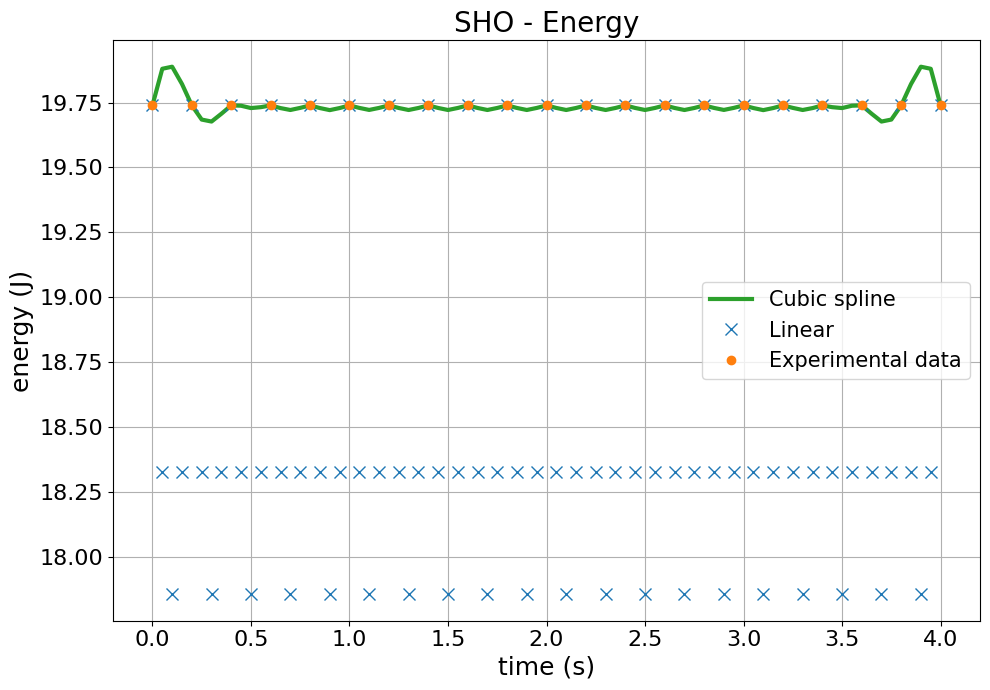

In [43]:
plt.figure(figsize=(10, 7))

plt.plot(tnew, en_cubic, label='Cubic spline', color='tab:green', linewidth=3)
plt.plot(tnew, en_linear, 'x', label='Linear', color='tab:blue', markersize=9)
plt.plot(t, en, 'o', label='Experimental data', color='tab:orange', linewidth=2)

plt.xlabel('time (s)', size=18)
plt.ylabel('energy (J)', size=18)
plt.xticks(size=16)
plt.yticks(size=16)
plt.title('SHO - Energy', size=20)
plt.legend(loc='center right', fontsize=15)
plt.grid(True)
plt.tight_layout()
plt.savefig('HW01_Prob4en.png', dpi=250, transparent=True)
plt.show()

In [40]:
# relative error for SHO energy
rel_err_linear_SHO = rel_err(en_linear, en_true)
rel_err_cubic_SHO = rel_err(en_cubic, en_true)

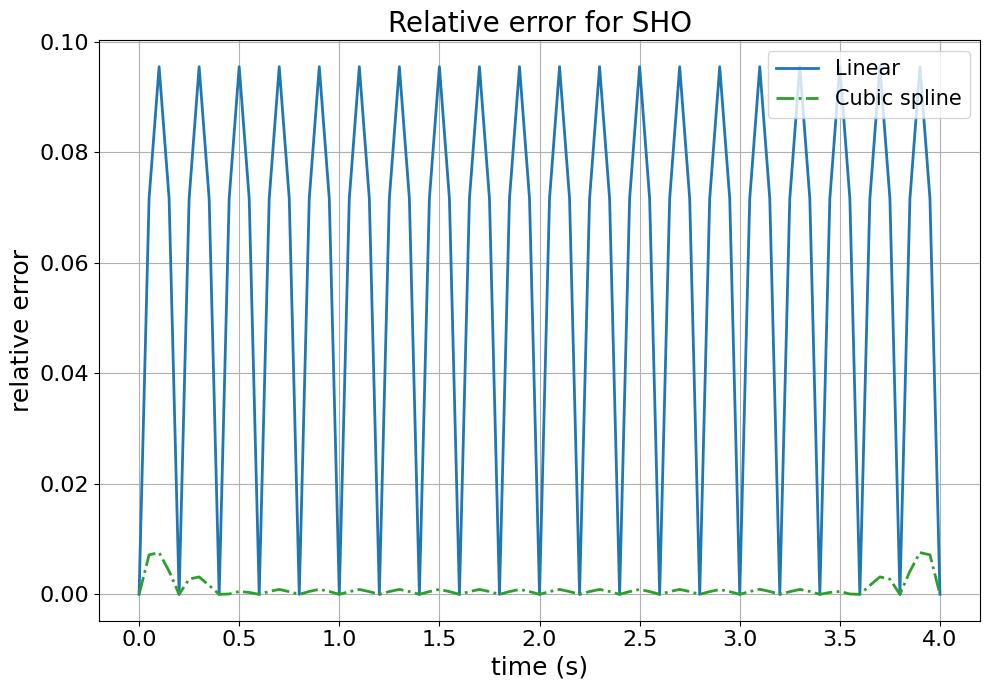

In [45]:
plt.figure(figsize=(10, 7))
plt.plot(tnew, rel_err_linear_SHO, label='Linear', color='tab:blue', linewidth=2)
plt.plot(tnew, rel_err_cubic_SHO, label='Cubic spline', color='tab:green', linewidth=2, linestyle='-.')

plt.xlabel('time (s)', size=18)
plt.ylabel('relative error', size=18)
plt.xticks(size=16)
plt.yticks(size=16)
plt.title('Relative error for SHO', size=20)
plt.legend(loc='upper right', fontsize=15)
plt.grid(True)
plt.tight_layout()
plt.savefig('HW01_Prob4error.png', dpi=250, transparent=True)
plt.show()